In [3]:
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_json ('Data/Indonesia.json', lines = True)
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1301333219296460800,1301317486151782400,2020-09-03 01:36:31,2020-09-03,08:36:31,SE Asia Standard Time,1057517144513097728,ambrosya1,Saaa,,...,,,,,,"[{'user_id': '1057517144513097728', 'username'...",,,,
1,1301376916205699073,1301376916205699072,2020-09-03 04:30:09,2020-09-03,11:30:09,SE Asia Standard Time,2983890506,shopeeid,Shopee Indonesia,,...,,,,,,"[{'user_id': '2983890506', 'username': 'Shopee...",,,,
2,1301320903754543105,1301317486151782400,2020-09-03 00:47:35,2020-09-03,07:47:35,SE Asia Standard Time,873911322160766976,gemintangnova,ðŸ�ŽðŸ��,,...,,,,,,"[{'user_id': '873911322160766976', 'username':...",,,,
3,1301319999995301890,1301317486151782400,2020-09-03 00:44:00,2020-09-03,07:44:00,SE Asia Standard Time,3013225207,muhamadamang_,Jare arek arek,,...,,,,,,"[{'user_id': '3013225207', 'username': 'muhama...",,,,
4,1301319958501097472,1301317486151782400,2020-09-03 00:43:50,2020-09-03,07:43:50,SE Asia Standard Time,1025023127892291584,bucinnyakult,Rrrr,,...,,,,,,"[{'user_id': '1025023127892291584', 'username'...",,,,


In [2]:
df_tweet = df[['id','tweet']]
df_tweet.head()

NameError: name 'df' is not defined

In [3]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('indonesian'))

In [5]:
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    return (" ".join(tokens)).strip()

In [6]:
from textblob import TextBlob

In [20]:
#Polarity

all_polarity = 0
label = ['Positive', 'Negative']
data = [0, 0]

df1 = df['tweet']
for tweet in df1:
    tweet = text_cleaner(tweet)
    print(tweet)
    
    analisa = TextBlob(tweet)
    if(analisa.sentiment.polarity >= 0):
        print("Positive")
        data[0] += 1
    else:
        print("Negative")
        data[1] += 1
    
    print(analisa.sentiment)
    all_polarity += analisa.polarity

tedak sinten
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
gfriend ngasih performance spesial tv show shopee duh sampe kelewatan super shopping day live shopee live sctv rcti indosiar mnctv tgl september pk wib buddy pengen bawain lagu aja coba pilih dishopeeadagfriend
Positive
Sentiment(polarity=0.07651515151515151, subjectivity=0.5666666666666667)
tedak sinten kalo ga salah adatnya bayi
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten tempatku nyebutnya pitonan
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten bahasa pitonan turun tanah injak tanah
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Positive
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten a k a injak tanah
Positiv

In [21]:
#Average of Polarity

if(all_polarity/495 > 0):
    print(all_polarity/495)
    print(" ")
    print("Positive")
else:
    print(all_polarity/495)
    print(" ")
    print("Negative")

0.014628354249566365
 
Positive


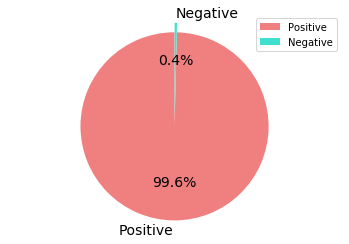

In [22]:
#Pie Chart of Polarity

import matplotlib.pyplot as plt

color = ["lightcoral", "turquoise"]

plt.pie(
    data,
    labels = label,
    shadow = False,
    explode = (0.1, 0),
    colors = color,
    startangle = 90,
    autopct = '%.1f%%',
    textprops = {'fontsize' : 14},
)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

In [23]:
#Subjectivity

all_subjectivity = 0
label = ['Objective', 'Subjective']
data = [0, 0]

df2 = df['tweet']
for tweet in df2:
    tweet = text_cleaner(tweet)
    print(tweet)
    
    analisa = TextBlob(tweet)
    if(analisa.sentiment.subjectivity >= 0):
        print("Objective")
        data[0] += 1
    else:
        print("Subjective")
        data[1] += 1
    
    print(analisa.sentiment)
    all_subjectivity += analisa.subjectivity

tedak sinten
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
gfriend ngasih performance spesial tv show shopee duh sampe kelewatan super shopping day live shopee live sctv rcti indosiar mnctv tgl september pk wib buddy pengen bawain lagu aja coba pilih dishopeeadagfriend
Objective
Sentiment(polarity=0.07651515151515151, subjectivity=0.5666666666666667)
tedak sinten kalo ga salah adatnya bayi
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten tempatku nyebutnya pitonan
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten bahasa pitonan turun tanah injak tanah
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten
Objective
Sentiment(polarity=0.0, subjectivity=0.0)
tedak sinten a k a injak tan

In [24]:
#Average of Subjectivity

if(all_subjectivity/495 > 0):
    print(all_subjectivity/495)
    print(" ")
    print("Objective")
else:
    print(all_subjectivity/495)
    print(" ")
    print("Subjective")

0.057908376696255474
 
Objective


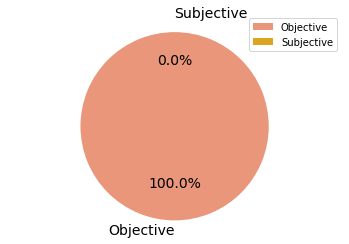

In [25]:
#Pie Chart of Polarity

import matplotlib.pyplot as plt

color = ["darksalmon", "goldenrod"]

plt.pie(
    data,
    labels = label,
    shadow = False,
    explode = (0.1, 0),
    colors = color,
    startangle = 90,
    autopct = '%.1f%%',
    textprops = {'fontsize' : 14},
)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

In [16]:
#Word Clud
df_tweet.head()

,id,tweet
0,1301333219296460800,tedak sinten
1,1301376916205699073,GFRIEND bakal ngasih performance spesial di TV...
2,1301320903754543105,"tedak sinten kalo ga salah, biasanya adatnya b..."
3,1301319999995301890,Tedak sinten
4,1301319958501097472,Tedak sinten


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [10]:
stop_words_file = 'SmartStopList.txt'

In [12]:
stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split())
        
stop_words = stop_words

def preprocess(raw_text):
    letters_only_text - re.sub("[^a-zA-Z]", " ", raw_text)
    words = letters_only_text.lower().split()
    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    return " ".join(stemmed_words)

FileNotFoundError: [Errno 2] No such file or directory: 'SmartStopList.txt'

In [17]:
df_tweet['prep'] = df_tweet['tweet'].apply(preprocess)

NameError: name 'preprocess' is not defined

In [18]:
test_sentence = "this is a sentence to demonstrate how the preprocessing function works...!"

preprocess(test_sentence)

NameError: name 'preprocess' is not defined